In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/Small_Datasets/4-wayAdditive_100feat.txt', delimiter='\t')
df

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,1,1,0,0,0,1,0,...,1,0,1,1,2,1,2,0,0,0
996,1,1,0,1,1,1,0,1,2,1,...,2,0,2,1,1,2,1,0,0,0
997,0,1,2,0,0,0,0,0,0,1,...,1,0,0,1,1,1,2,0,0,0
998,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,0,2,2,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


In [4]:
df.isnull().sum()

N0       0
N1       0
N2       0
N3       0
N4       0
        ..
M0P1     0
M1P2     0
M2P3     0
M3P4     0
Class    0
Length: 101, dtype: int64

In [5]:
df.describe()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.31600,0.580000,0.936000,0.496000,0.865000,0.197000,0.222000,0.54400,0.702000,0.581000,...,0.859000,0.347000,0.783000,0.830000,0.961000,0.883000,0.839000,0.855000,0.898000,0.50000
std,0.52385,0.644993,0.708806,0.605269,0.693726,0.407869,0.430001,0.63755,0.685322,0.638629,...,0.693974,0.518517,0.694545,0.703986,0.701406,0.773246,0.783385,0.805372,0.832039,0.50025
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.50000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.00000
max,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000


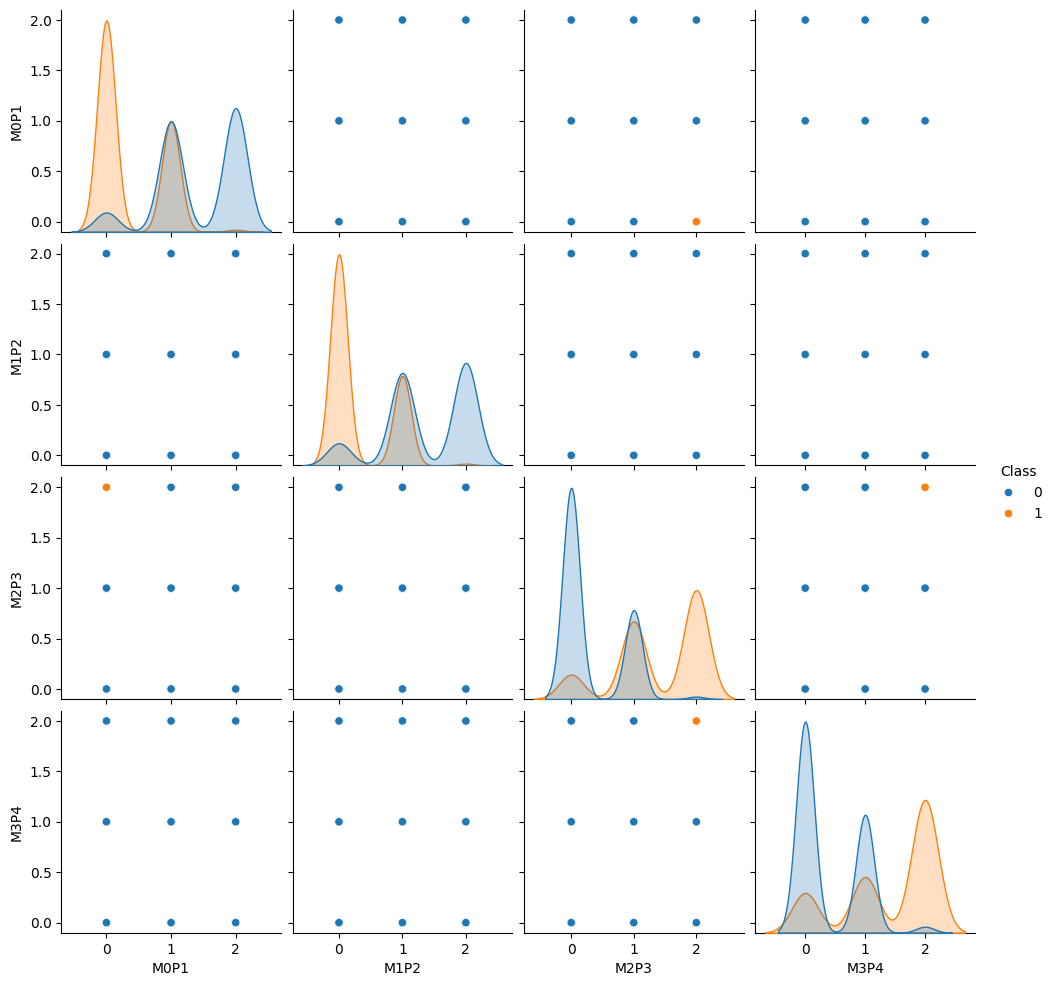

In [6]:
sns.pairplot(df[['M0P1', 'M1P2', 'M2P3', 'M3P4', 'Class']], hue='Class', diag_kind='kde')
plt.show()

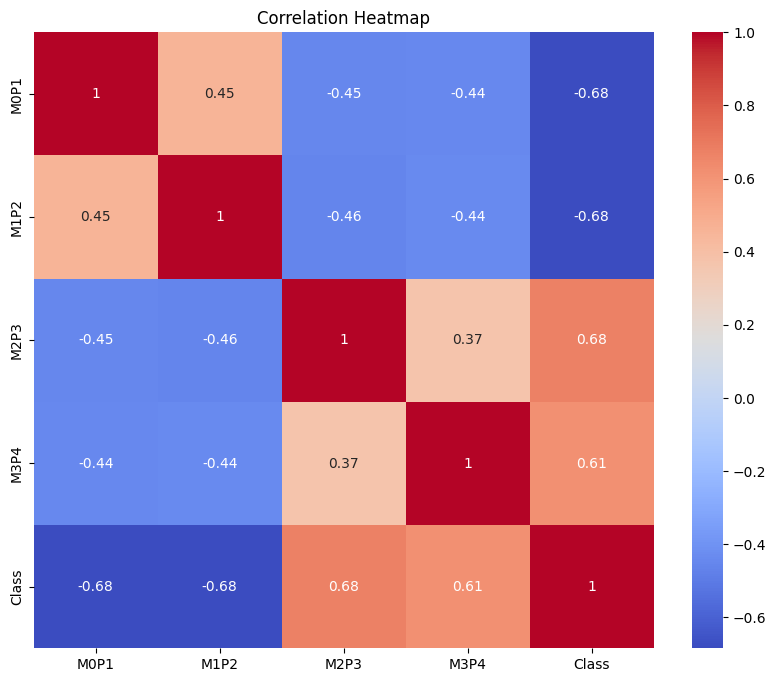

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['M0P1', 'M1P2', 'M2P3', 'M3P4', 'Class']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

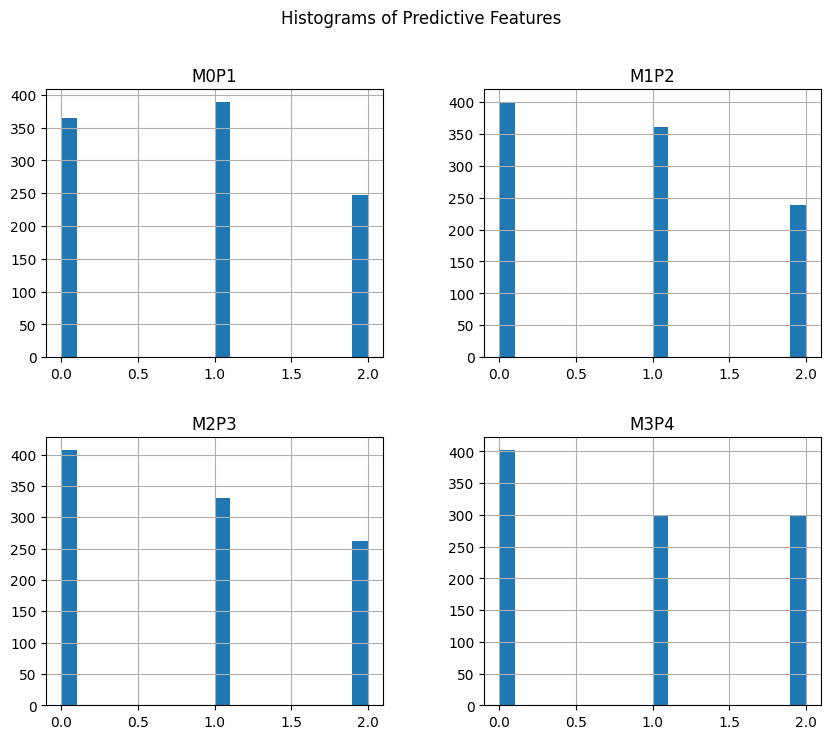

In [8]:
df[['M0P1', 'M1P2', 'M2P3', 'M3P4']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Predictive Features')
plt.show()

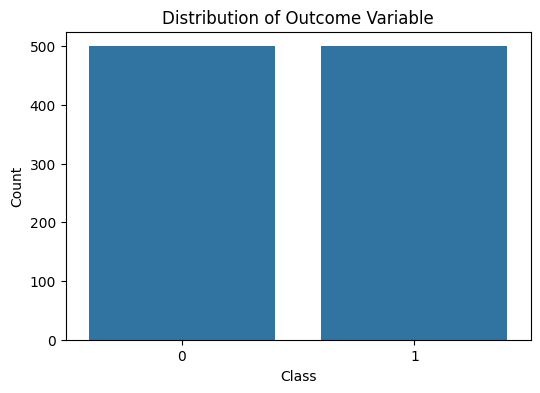

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/envs/nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


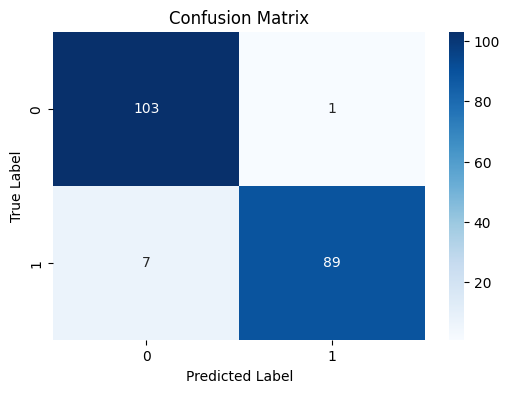

In [10]:
# Preprocessing
X = df[['M0P1', 'M1P2', 'M2P3', 'M3P4']]
y = df[['Class']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

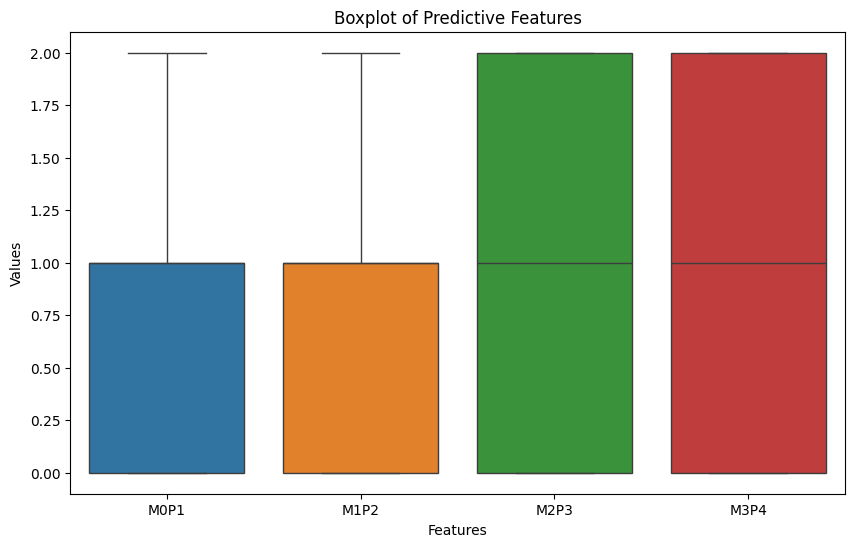

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['M0P1', 'M1P2', 'M2P3', 'M3P4']])
plt.title('Boxplot of Predictive Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


/var/folders/mn/wbdrprjj4f1dmj620rw6mx6r0000gn/T/ipykernel_4795/1797378961.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['M0P1'], shade=True, label='M0P1')
/var/folders/mn/wbdrprjj4f1dmj620rw6mx6r0000gn/T/ipykernel_4795/1797378961.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['M1P2'], shade=True, label='M1P2')
/var/folders/mn/wbdrprjj4f1dmj620rw6mx6r0000gn/T/ipykernel_4795/1797378961.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['M2P3'], shade=True, label='M2P3')
/var/folders/mn/wbdrprjj4f1dmj620rw6mx6r0000gn/T/ipykernel_4795/1797378961.py:5: FutureWarning: 

`shade` is now depre

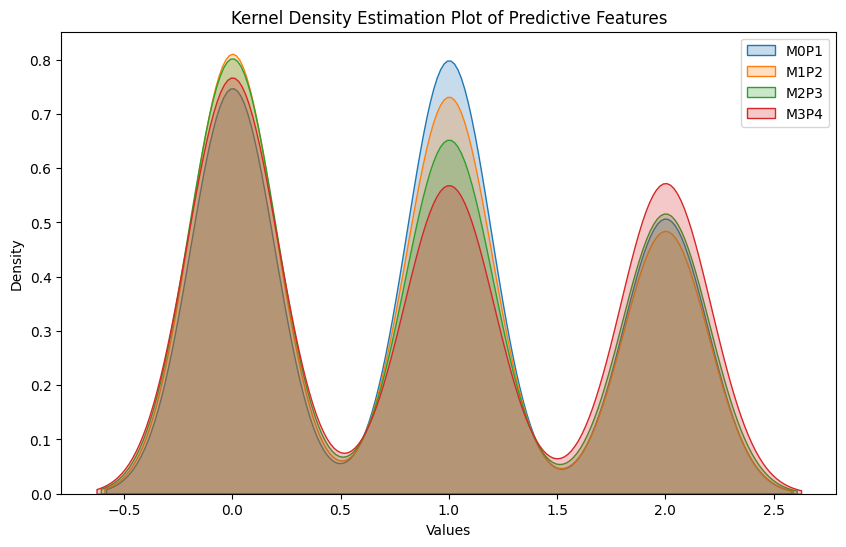

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['M0P1'], shade=True, label='M0P1')
sns.kdeplot(data=df['M1P2'], shade=True, label='M1P2')
sns.kdeplot(data=df['M2P3'], shade=True, label='M2P3')
sns.kdeplot(data=df['M3P4'], shade=True, label='M3P4')
plt.title('Kernel Density Estimation Plot of Predictive Features')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [13]:
X = df[['M0P1', 'M1P2', 'M2P3', 'M3P4']]
y = df[['Class']]

In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': LogisticRegression(),
            'params': {
                'C': [1, 5, 10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.05, 0.1, 0.2]
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'C': [1, 10, 100],
                'kernel': ['linear', 'rbf']
            }
        },
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5, 10, 20],
                'weights': ['uniform', 'distance']
            }
        },
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {}
        },
        'gp': {
            'model': GaussianProcessClassifier(),
            'params': {}
        },
        'ensemble': {
            'model': VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())]),
            'params': {
                'voting': ['hard', 'soft']
            }
        },
        'semi_supervised': {
            'model': LabelPropagation(),
            'params': {
                'kernel': ['knn', 'rbf'],
                'gamma': [0.1, 0.5, 1.0]
            }
        },
        'anomaly_detection': {
            'model': EllipticEnvelope(),
            'params': {
                'contamination': [0.1, 0.2, 0.3]
            }
        }
    }

    # Perform PCA for feature reduction
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # Add PCA as an algorithm
    algos['pca'] = {
        'model': None,
        'params': {}
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        if algo_name == 'pca':
            # Use cross_val_score for PCA
            pca_scores = cross_val_score(LinearRegression(), X_pca, y, cv=cv)
            scores.append({
                'model': algo_name,
                'best_score': pca_scores.mean(),
                'best_params': {},
                'best_precision': None,
                'best_recall': None,
                'best_f1_score': None
            })
        elif algo_name == 'ensemble':
            # Special handling for ensemble method as it requires estimators
            gs = GridSearchCV(config['model'], param_grid=config['params'], cv=cv, return_train_score=False)
            gs.fit(X, y)
            # Calculate precision, recall, and F1 score and store them
            precision, recall, f1_score = calculate_precision_recall_f1(gs.best_estimator_, X, y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_,
                'best_precision': precision,
                'best_recall': recall,
                'best_f1_score': f1_score
            })
        else:
            gs = GridSearchCV(config['model'], param_grid=config['params'], cv=cv, return_train_score=False)
            gs.fit(X, y)
            # Calculate precision, recall, and F1 score and store them
            precision, recall, f1_score = calculate_precision_recall_f1(gs.best_estimator_, X, y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_,
                'best_precision': precision,
                'best_recall': recall,
                'best_f1_score': f1_score
            })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_precision', 'best_recall', 'best_f1_score'])

def calculate_precision_recall_f1(model, X, y):
    # Make predictions using the model
    y_pred = model.predict(X)
    
    # Convert y_pred to discrete class labels if it's continuous
    y_pred_discrete = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Example thresholding for binary classification
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred_discrete, average='binary')
    
    return precision, recall, f1_score

# Assuming X and y are your feature matrix and target variable respectively
result = find_best_model_using_gridsearchcv(X, y)
result


/opt/anaconda3/envs/nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/nn/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

,model,best_score,best_params,best_precision,best_recall,best_f1_score
0,linear_regression,0.769419,{},0.963636,0.954,0.958794
1,lasso,0.964000,{'C': 1},0.969512,0.954,0.961694
2,decision_tree,0.951000,"{'criterion': 'gini', 'splitter': 'random'}",0.967742,0.960,0.963855
3,random_forest,0.955000,"{'criterion': 'gini', 'n_estimators': 100}",0.967742,0.960,0.963855
4,gradient_boosting,0.959000,"{'learning_rate': 0.05, 'n_estimators': 50}",0.965795,0.960,0.962889
5,svm,0.964000,"{'C': 10, 'kernel': 'linear'}",0.958084,0.960,0.959041
6,knn,0.961000,"{'n_neighbors': 20, 'weights': 'uniform'}",0.945098,0.964,0.954455
7,naive_bayes,0.967000,{},0.967677,0.958,0.962814
8,gp,0.962000,{},0.967677,0.958,0.962814
9,ensemble,0.957000,{'voting': 'soft'},0.967742,0.960,0.963855


In [15]:
result

,model,best_score,best_params,best_precision,best_recall,best_f1_score
0,linear_regression,0.769419,{},0.963636,0.954,0.958794
1,lasso,0.964000,{'C': 1},0.969512,0.954,0.961694
2,decision_tree,0.951000,"{'criterion': 'gini', 'splitter': 'random'}",0.967742,0.960,0.963855
3,random_forest,0.955000,"{'criterion': 'gini', 'n_estimators': 100}",0.967742,0.960,0.963855
4,gradient_boosting,0.959000,"{'learning_rate': 0.05, 'n_estimators': 50}",0.965795,0.960,0.962889
5,svm,0.964000,"{'C': 10, 'kernel': 'linear'}",0.958084,0.960,0.959041
6,knn,0.961000,"{'n_neighbors': 20, 'weights': 'uniform'}",0.945098,0.964,0.954455
7,naive_bayes,0.967000,{},0.967677,0.958,0.962814
8,gp,0.962000,{},0.967677,0.958,0.962814
9,ensemble,0.957000,{'voting': 'soft'},0.967742,0.960,0.963855
